In [1]:


%reset -f
%matplotlib notebook
from jupyterthemes import jtplot
jtplot.style()

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans

import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
## load data
iris_df = pd.read_csv('datasets/iris.csv',
                     skiprows=1,
                     names = ['sepal-length',
                             'sepal-width',
                             'petal-length',
                             'petal-width',
                             'class'])
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
## randomize rows
iris_df = iris_df.sample(frac=1).reset_index(drop=True)
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.8,3.0,1.4,0.3,Iris-setosa
1,5.1,3.7,1.5,0.4,Iris-setosa
2,7.7,2.8,6.7,2.0,Iris-virginica
3,7.1,3.0,5.9,2.1,Iris-virginica
4,6.1,2.8,4.7,1.2,Iris-versicolor


In [5]:
iris_df.shape

(150, 5)

In [6]:
iris_df['class'].unique()

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], dtype=object)

In [8]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
iris_df['class'] = label_encoding.fit_transform(iris_df['class'].astype(str))
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.8,3.0,1.4,0.3,0
1,5.1,3.7,1.5,0.4,0
2,7.7,2.8,6.7,2.0,2
3,7.1,3.0,5.9,2.1,2
4,6.1,2.8,4.7,1.2,1


#### Exploring datasets

<IPython.core.display.Javascript object>


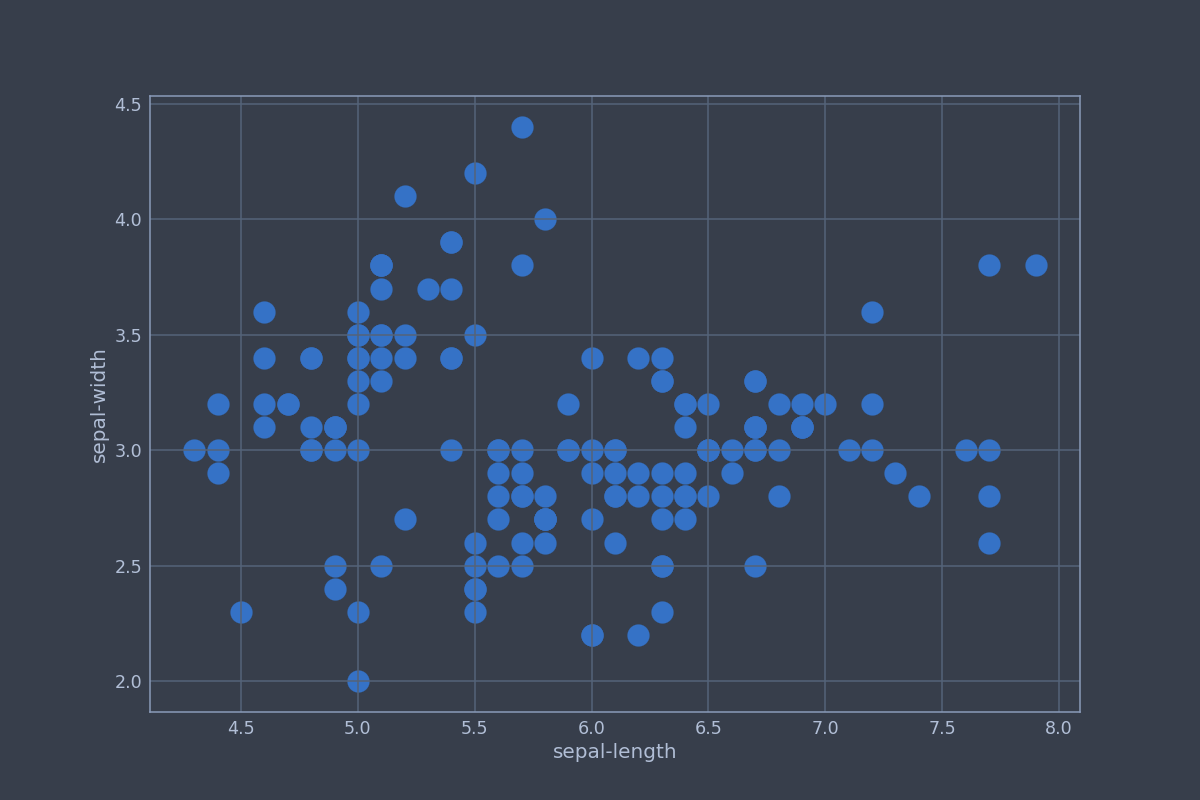

In [10]:
fix, ax = plt.subplots(figsize = (12, 8))
plt.scatter(iris_df['sepal-length'],iris_df['sepal-width'],s=250)
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')
plt.show();

<IPython.core.display.Javascript object>


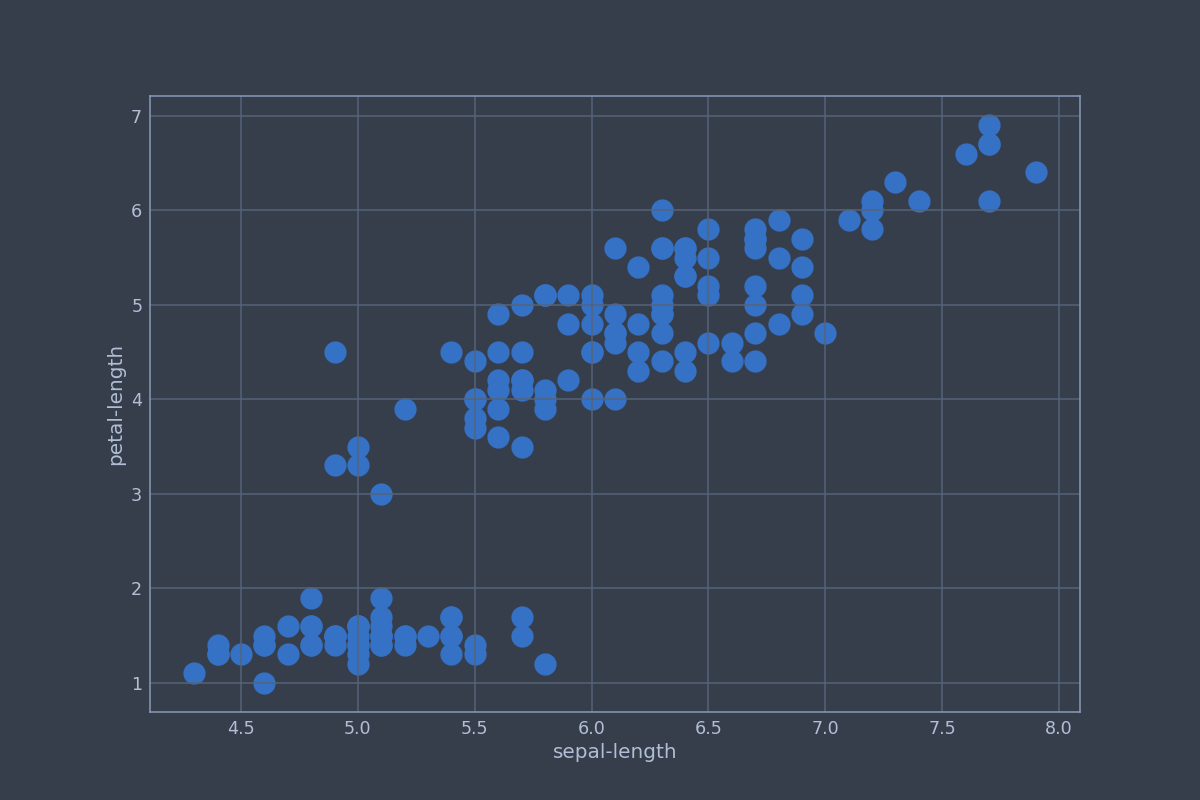

In [13]:
fix, ax = plt.subplots(figsize = (12, 8))
plt.scatter(iris_df['sepal-length'],iris_df['petal-length'],s=250)
plt.ylabel('petal-length')
plt.xlabel('sepal-length')
plt.show();

<IPython.core.display.Javascript object>


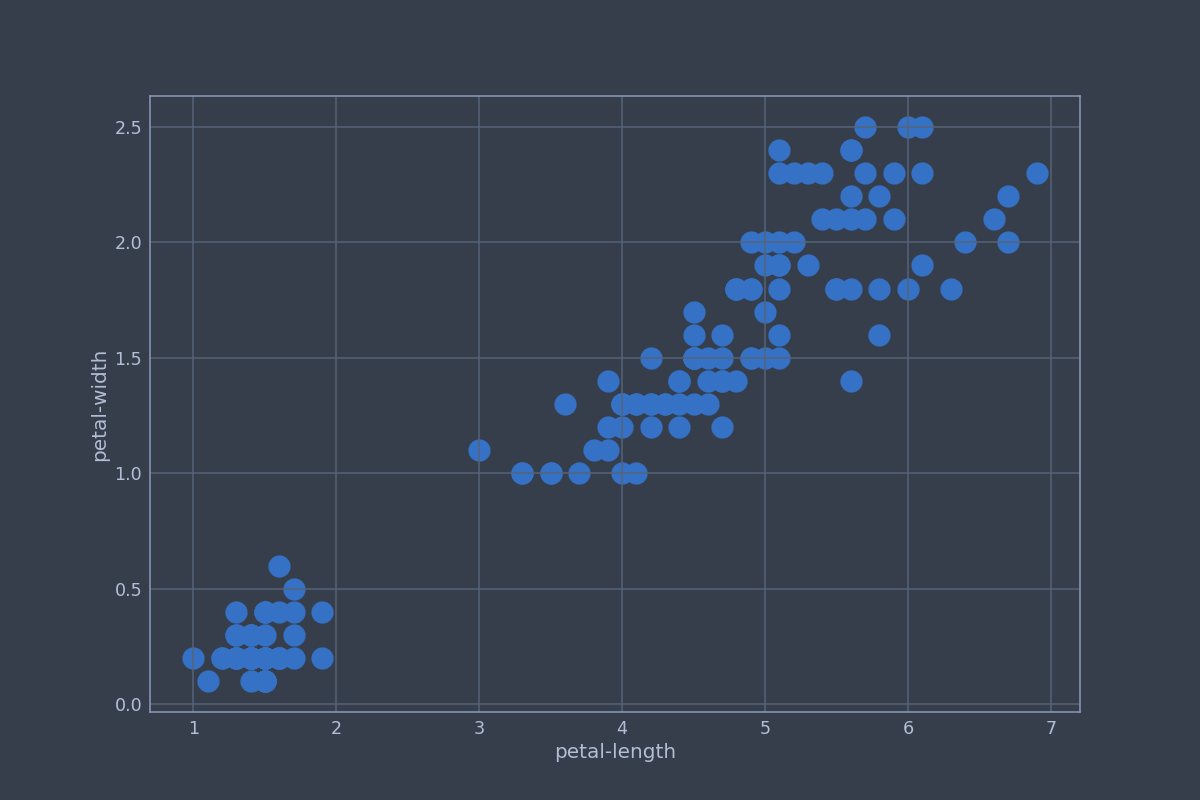

In [15]:
fix, ax = plt.subplots(figsize = (12, 8))
plt.scatter(iris_df['petal-length'],iris_df['petal-width'],s=250)
plt.xlabel('petal-length')
plt.ylabel('petal-width')
plt.show();

In [16]:
iris_2D = iris_df[['sepal-length','petal-length']]
iris_2D.sample(5)

,sepal-length,petal-length
116,4.9,1.4
10,4.8,1.4
118,4.4,1.3
100,6.4,5.5
49,4.8,1.9


In [18]:
## convert data to array before clustering
iris_2D = np.array(iris_2D)
## create the model
kmeans_model_2D = KMeans(n_clusters=3, max_iter=1000).fit(iris_2D)
kmeans_model_2D.labels_

array([1, 1, 2, 2, 0, 2, 1, 2, 2, 0, 1, 0, 0, 0, 1, 0, 2, 2, 1, 1, 0, 2,
       1, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 2, 0, 1, 2, 2, 0,
       0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 0, 2, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 2,
       0, 0, 1, 2, 1, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 1, 0, 2, 1,
       2, 2, 2, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0], dtype=int32)

In [19]:
centroids_2D = kmeans_model_2D.cluster_centers_
centroids_2D

array([[5.87413793, 4.39310345],
       [5.00784314, 1.49411765],
       [6.83902439, 5.67804878]])

<IPython.core.display.Javascript object>


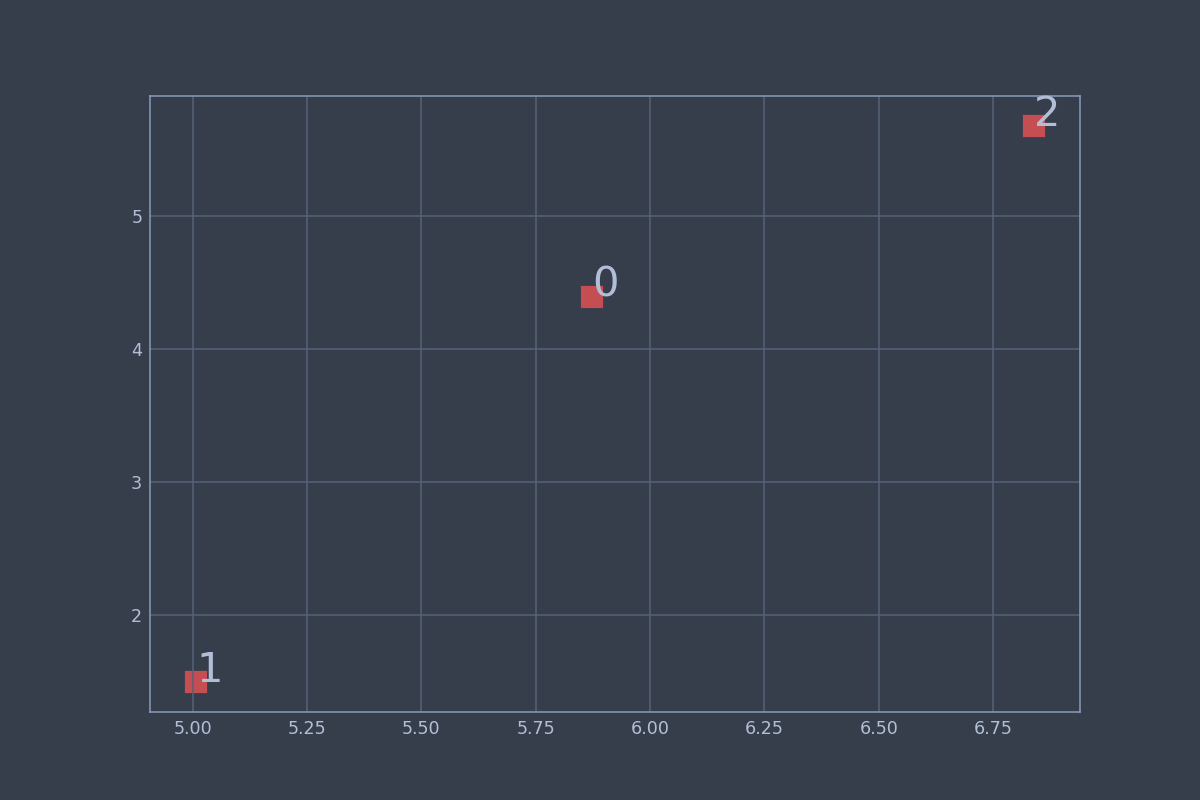

In [21]:
# colors = ['green','blue','purple']
plt.figure(figsize=(12,8))
# plt.scatter(df['data_x'],df['data_y'], c = df['labels'],s=200,cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c = 'r',s=250, marker='s')
for i in range(len(centroids_2D)):
    plt.annotate(i,(centroids_2D[i][0], centroids_2D[i][1]),fontsize=30)
    
# plt.scatter(data_test[:,0],data_test[:,1], c='orange',s=250,marker='^')
# for i in range(len(data_test)):
#     plt.annotate(label_pred[i],(data_test[i][0]+7, data_test[i][1]+7),fontsize=30)

In [24]:
iris_labels = iris_df['class']
print('Homogeneity_score: ',metrics.homogeneity_score(iris_labels,kmeans_model_2D.labels_))
print('Completeness_score: ', metrics.completeness_score(iris_labels, kmeans_model_2D.labels_))
print('v_measure_score: ', metrics.v_measure_score(iris_labels, kmeans_model_2D.labels_))
print('Adjusted_rand_score: ',metrics.adjusted_rand_score(iris_labels, kmeans_model_2D.labels_))
print('Adjusted_mutual_info_socre: ', metrics.adjusted_mutual_info_score(iris_labels,kmeans_model_2D.labels_))
print('Silhouette_score: ', metrics.silhouette_score(iris_2D, kmeans_model_2D.labels_))

Homogeneity_score:  0.7033177646052958
Completeness_score:  0.7096993707802843
v_measure_score:  0.706494157075837
Adjusted_rand_score:  0.6988627672348092
Adjusted_mutual_info_socre:  0.6996030957074747
Silhouette_score:  0.5890612473759281


<IPython.core.display.Javascript object>


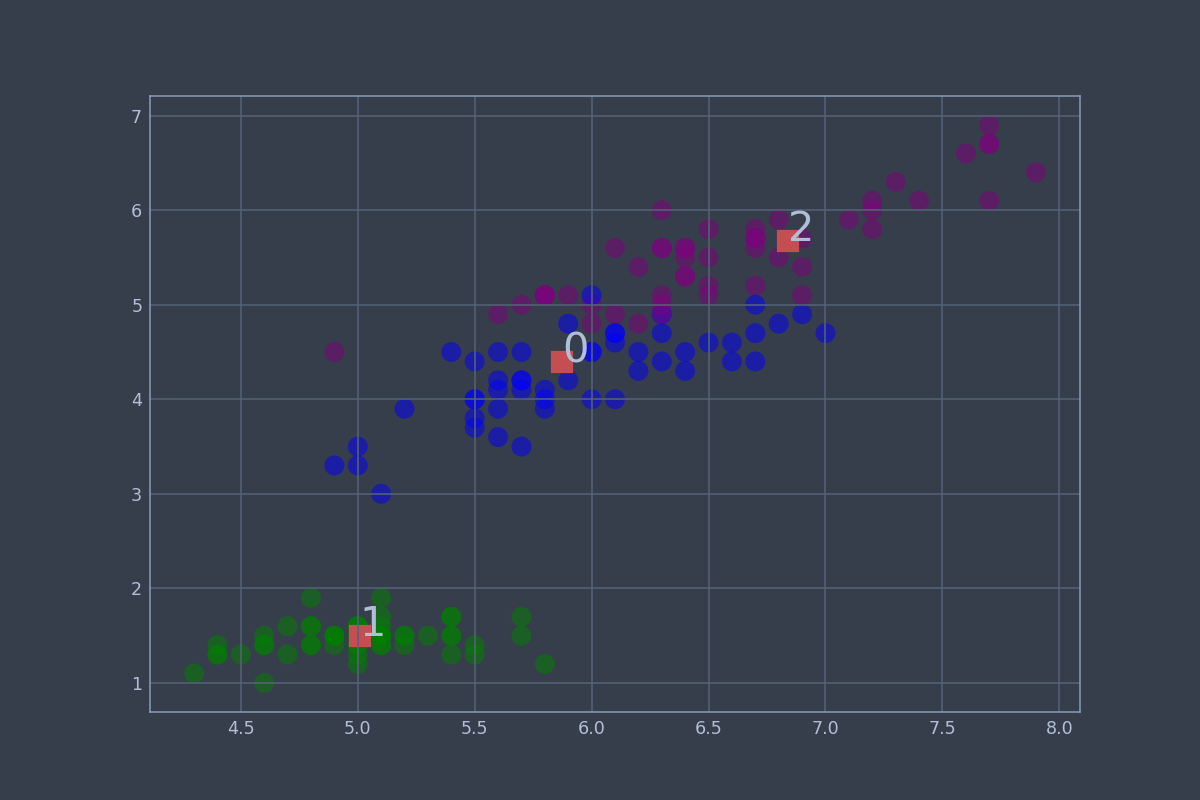

In [27]:
colors = ['green','blue','purple']
plt.figure(figsize=(12,8))
plt.scatter(iris_df['sepal-length'],iris_df['petal-length'], c = iris_df['class'],s=200,cmap=matplotlib.colors.ListedColormap(colors),alpha=0.5)
plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c = 'r',s=250, marker='s')
for i in range(len(centroids_2D)):
    plt.annotate(i,(centroids_2D[i][0], centroids_2D[i][1]),fontsize=30)
    
# plt.scatter(data_test[:,0],data_test[:,1], c='orange',s=250,marker='^')
# for i in range(len(data_test)):
#     plt.annotate(label_pred[i],(data_test[i][0]+7, data_test[i][1]+7),fontsize=30)

In [28]:
iris_features = iris_df.drop('class',axis=1)
iris_features.head()

,sepal-length,sepal-width,petal-length,petal-width
0,4.8,3.0,1.4,0.3
1,5.1,3.7,1.5,0.4
2,7.7,2.8,6.7,2.0
3,7.1,3.0,5.9,2.1
4,6.1,2.8,4.7,1.2


In [29]:
iris_labels = iris_df['class']
iris_labels.sample(5)

3      2
117    1
37     1
146    0
86     1
Name: class, dtype: int64

In [30]:
kmeans_model = KMeans(n_clusters=3).fit(iris_features)
kmeans_model.labels_

array([0, 0, 2, 2, 1, 2, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 0, 1, 2,
       0, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1,
       1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2,
       1, 1, 0, 2, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 2, 2, 0, 1, 2, 0,
       2, 2, 2, 0, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int32)

In [31]:
kmeans_model.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [32]:
iris_labels = iris_df['class']
print('Homogeneity_score: ',metrics.homogeneity_score(iris_labels,kmeans_model.labels_))
print('Completeness_score: ', metrics.completeness_score(iris_labels, kmeans_model.labels_))
print('v_measure_score: ', metrics.v_measure_score(iris_labels, kmeans_model.labels_))
print('Adjusted_rand_score: ',metrics.adjusted_rand_score(iris_labels, kmeans_model.labels_))
print('Adjusted_mutual_info_socre: ', metrics.adjusted_mutual_info_score(iris_labels,kmeans_model.labels_))
print('Silhouette_score: ', metrics.silhouette_score(iris_features, kmeans_model.labels_))

Homogeneity_score:  0.7514854021988338
Completeness_score:  0.7649861514489815
v_measure_score:  0.7581756800057784
Adjusted_rand_score:  0.7302382722834697
Adjusted_mutual_info_socre:  0.7483723933229484
Silhouette_score:  0.5525919445499758
